In [14]:
# Import required packages
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

In [15]:
# Creates DBN model
dbnet = DBN()

In [16]:
# Add arcs/connection to the DBN Model

# The nodes are represented as a tuple which the first position is the node name and the second
# the time slice index

dbnet.add_edges_from(
    [
        
        # Subject Arcs
        (('CA', 0), ('H', 0)),
        (('CO', 0), ('H', 0)),
        
        # Evidence Arcs
        (('CA', 0), ('EvCA', 0)),
        (('CO', 0), ('EvCO', 0)),
        (('H', 0), ('EvH', 0)),
        
        # Transition Arcs
        (('CA', 0), ('CA', 1)),
        (('CO', 0), ('CO', 1)),
        (('H', 0), ('H', 1))
    ]
)

In [17]:
# Create the subjects CPDs

# Subjects CPDs

ca_cpd = TabularCPD(
    variable=('CA', 0),
    variable_card=2,
    values=[
        [0.5, 0.5]
    ]
)

print('\nSubject CPD for CA')
print(ca_cpd)

co_cpd = TabularCPD(
    variable=('CO', 0),
    variable_card=2,
    values=[
        [0.5, 0.5]
    ]
)

print('\nSubject CPD for CO')
print(co_cpd)

h_cpd = TabularCPD(
    variable=('H', 0),
    variable_card=2,
    values=[
        [0.9, 0.65, 0.65, 0.2],
        [0.1, 0.35, 0.35, 0.8]],
    evidence=[('CA', 0), ('CO', 0)],
    evidence_card=[2, 2]
)

print('\nSubject CPD for H')
print(h_cpd)

subjects_cpds = [
    ca_cpd,
    co_cpd,
    h_cpd
]


Subject CPD for CA
+--------------+-----+
| ('CA', 0)(0) | 0.5 |
+--------------+-----+
| ('CA', 0)(1) | 0.5 |
+--------------+-----+

Subject CPD for CO
+--------------+-----+
| ('CO', 0)(0) | 0.5 |
+--------------+-----+
| ('CO', 0)(1) | 0.5 |
+--------------+-----+

Subject CPD for H
+-------------+--------------+--------------+--------------+--------------+
| ('CA', 0)   | ('CA', 0)(0) | ('CA', 0)(0) | ('CA', 0)(1) | ('CA', 0)(1) |
+-------------+--------------+--------------+--------------+--------------+
| ('CO', 0)   | ('CO', 0)(0) | ('CO', 0)(1) | ('CO', 0)(0) | ('CO', 0)(1) |
+-------------+--------------+--------------+--------------+--------------+
| ('H', 0)(0) | 0.9          | 0.65         | 0.65         | 0.2          |
+-------------+--------------+--------------+--------------+--------------+
| ('H', 0)(1) | 0.1          | 0.35         | 0.35         | 0.8          |
+-------------+--------------+--------------+--------------+--------------+


In [18]:
# Create the evidences CPDs

# Evidences CPDs

ev_ca_cpd = TabularCPD(
    variable=('EvCA', 0),
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=[('CA', 0)],
    evidence_card=[2]
)

print('\nEvidence CPD for CA at 0')
print(ev_ca_cpd)

ev_co_cpd = TabularCPD(
    variable=('EvCO', 0),
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=[('CO', 0)],
    evidence_card=[2]
)

print('\nEvidence CPD for CO at 0')
print(ev_co_cpd)

ev_h_cpd = TabularCPD(
    variable=('EvH', 0),
    variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9]
    ],
    evidence=[('H', 0)],
    evidence_card=[2]
)

print('\nEvidence CPD for H at 0')
print(ev_h_cpd)

evidences_cpds = [
    ev_ca_cpd,
    ev_co_cpd,
    ev_h_cpd
]


Evidence CPD for CA at 0
+----------------+--------------+--------------+
| ('CA', 0)      | ('CA', 0)(0) | ('CA', 0)(1) |
+----------------+--------------+--------------+
| ('EvCA', 0)(0) | 0.8          | 0.1          |
+----------------+--------------+--------------+
| ('EvCA', 0)(1) | 0.2          | 0.9          |
+----------------+--------------+--------------+

Evidence CPD for CO at 0
+----------------+--------------+--------------+
| ('CO', 0)      | ('CO', 0)(0) | ('CO', 0)(1) |
+----------------+--------------+--------------+
| ('EvCO', 0)(0) | 0.8          | 0.1          |
+----------------+--------------+--------------+
| ('EvCO', 0)(1) | 0.2          | 0.9          |
+----------------+--------------+--------------+

Evidence CPD for H at 0
+---------------+-------------+-------------+
| ('H', 0)      | ('H', 0)(0) | ('H', 0)(1) |
+---------------+-------------+-------------+
| ('EvH', 0)(0) | 0.8         | 0.1         |
+---------------+-------------+-------------+
| ('EvH

In [19]:
# Create transitions CPDs
# Transitions CPDs

ca_transition_cpd = TabularCPD(
    variable=('CA', 1),
    variable_card=2,
    values=[
        [0.9990, 0.0010],
        [0.0010, 0.9990]
    ],
    evidence=[('CA', 0)],
    evidence_card=[2]
)

print('\Transition CPD for CO')
print(ca_transition_cpd)

co_transition_cpd = TabularCPD(
    variable=('CO', 1),
    variable_card=2,
    values=[
        [0.9990, 0.0010],
        [0.0010, 0.9990]
    ],
    evidence=[('CO', 0)],
    evidence_card=[2]
)

print('\Transition CPD for H')
print(co_transition_cpd)

h_transition_cpd = TabularCPD(
    variable=('H', 1),
    variable_card=2,
    values=[
        [0.9, 0.85, 0.85, 0.35, 0.85, 0.35, 0.35, 0.1],
        [0.1, 0.15, 0.15, 0.65, 0.15, 0.65, 0.65, 0.9]
    ],
    evidence=[
        ('CA', 1),
        ('CO', 1),
        ('H', 0),
    ],
    evidence_card=[2, 2, 2]
)

print('\Transition CPD for H')
print(h_transition_cpd)

transitions_cpds = [
    ca_transition_cpd,
    co_transition_cpd,
    h_transition_cpd
]

\Transition CPD for CO
+--------------+--------------+--------------+
| ('CA', 0)    | ('CA', 0)(0) | ('CA', 0)(1) |
+--------------+--------------+--------------+
| ('CA', 1)(0) | 0.999        | 0.001        |
+--------------+--------------+--------------+
| ('CA', 1)(1) | 0.001        | 0.999        |
+--------------+--------------+--------------+
\Transition CPD for H
+--------------+--------------+--------------+
| ('CO', 0)    | ('CO', 0)(0) | ('CO', 0)(1) |
+--------------+--------------+--------------+
| ('CO', 1)(0) | 0.999        | 0.001        |
+--------------+--------------+--------------+
| ('CO', 1)(1) | 0.001        | 0.999        |
+--------------+--------------+--------------+
\Transition CPD for H
+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| ('CA', 1)   | ('CA', 1)(0) | ('CA', 1)(0) | ('CA', 1)(0) | ('CA', 1)(0) | ('CA', 1)(1) | ('CA', 1)(1) | ('CA', 1)(1) | ('CA', 1)(1) |
+--

In [20]:
# Concatenate CPDs and add them to the DBN model

cpds = subjects_cpds + evidences_cpds + transitions_cpds

dbnet.add_cpds(*cpds)
dbnet.initialize_initial_state()

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

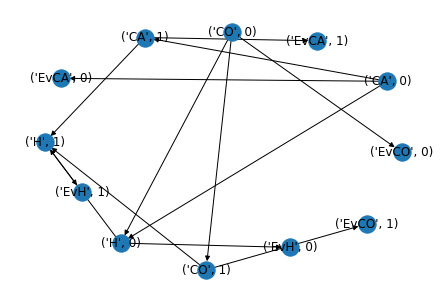

In [22]:
# nx.draw(student, with_labels=True)
nx.draw(dbnet, with_labels=True)
plt.show()

In [23]:
# Import inference structure
from pgmpy.inference import DBNInference

In [26]:
# Create a inference object
dbn_inf = DBNInference(dbnet)

In [27]:
# Show nodes
dbn_inf.start_junction_tree.nodes()

NodeView(((('H', 0), ('EvH', 0)), (('H', 0), ('CA', 0), ('CO', 0)), (('EvCO', 0), ('CO', 0)), (('EvCA', 0), ('CA', 0))))

In [28]:
dbn_inf.one_and_half_junction_tree.nodes()

NodeView(((('EvH', 1), ('CA', 1), ('CO', 0), ('CA', 0), ('EvCA', 1), ('EvCO', 1)), (('EvH', 1), ('CA', 1), ('CO', 0), ('CA', 0), ('CO', 1), ('EvCO', 1)), (('EvH', 1), ('CA', 1), ('CO', 0), ('CA', 0), ('CO', 1), ('H', 0)), (('EvH', 1), ('CA', 1), ('H', 1), ('H', 0), ('CO', 1))))

In [29]:
print(dbn_inf.forward_inference([('CA', 0)], {('EvCA', 0):1})[('CA', 0)])

Eliminating: ('CO', 0): 100%|██████████| 2/2 [00:00<00:00, 321.13it/s]

+--------------+------------------+
| ('CA', 0)    |   phi(('CA', 0)) |
+==============+==================+
| ('CA', 0)(0) |           0.1818 |
+--------------+------------------+
| ('CA', 0)(1) |           0.8182 |
+--------------+------------------+


In [30]:
print(dbn_inf.forward_inference([('CA', 1)], {('EvCA', 1):1, ('EvCA', 0):1})[('CA', 1)])

Eliminating: ('CA', 0): 100%|██████████| 7/7 [00:00<00:00, 215.69it/s]

+--------------+------------------+
| ('CA', 1)    |   phi(('CA', 1)) |
+==============+==================+
| ('CA', 1)(0) |           0.0473 |
+--------------+------------------+
| ('CA', 1)(1) |           0.9527 |
+--------------+------------------+


In [72]:
print(dbn_inf.forward_inference([('CA', 1)], {('EvCA', 1):1, ('EvCA', 0):1})[('CA', 1)])

Eliminating: ('Chuva', 0): 100%|██████████| 1/1 [00:00<00:00, 134.25it/s]

+-----------------+---------------------+
| ('Chuva', 3)    |   phi(('Chuva', 3)) |
+=================+=====================+
| ('Chuva', 3)(0) |              0.1055 |
+-----------------+---------------------+
| ('Chuva', 3)(1) |              0.8945 |
+-----------------+---------------------+
